In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [30]:
print("Projeto OdontoPrev - Detecção de Padrões Comportamentais")
print("Objetivo: Identificar padrões comportamentais dos beneficiários para melhorar o atendimento e reduzir custos.")

Projeto OdontoPrev - Detecção de Padrões Comportamentais
Objetivo: Identificar padrões comportamentais dos beneficiários para melhorar o atendimento e reduzir custos.


In [31]:
data = {
    'Paciente_ID': range(1, 101),
    'Historico_Tratamento': np.random.choice(['Tratamento_A', 'Tratamento_B', 'Tratamento_C'], 100),
    'Faltas': np.random.randint(0, 3, 100),
    'Sinistro': np.random.choice([0, 1], 100)  # 0 para não sinistro, 1 para sinistro
}

In [32]:
df = pd.DataFrame(data)
print("Exemplo dos dados coletados:")
print(df.head())

Exemplo dos dados coletados:
   Paciente_ID Historico_Tratamento  Faltas  Sinistro
0            1         Tratamento_B       0         1
1            2         Tratamento_A       1         1
2            3         Tratamento_B       0         0
3            4         Tratamento_A       1         1
4            5         Tratamento_A       2         1


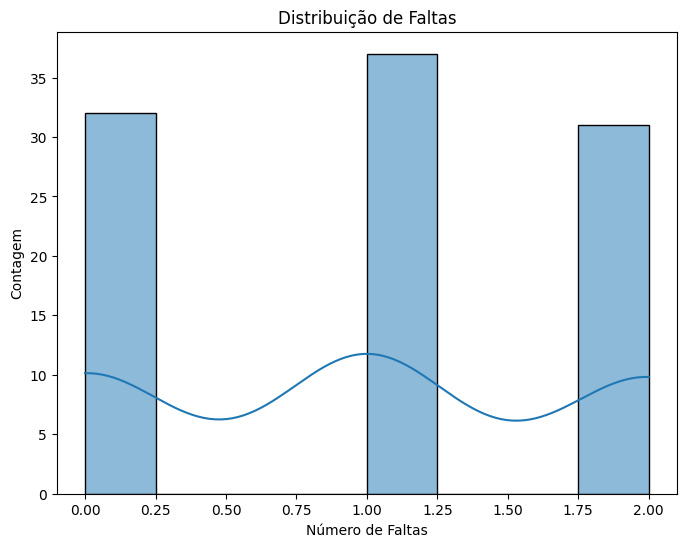

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Faltas'], kde=True)
plt.title('Distribuição de Faltas')
plt.xlabel('Número de Faltas')
plt.ylabel('Contagem')
plt.show()

In [34]:
X = df[['Faltas']]
y = df['Sinistro']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = clf.predict(X_test)

In [38]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        14
           1       0.00      0.00      0.00        16

    accuracy                           0.47        30
   macro avg       0.23      0.50      0.32        30
weighted avg       0.22      0.47      0.30        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[14  0]
 [16  0]]


In [41]:
#Análise Detalhada por Paciente
df['Probabilidade_Sinistro'] = clf.predict_proba(X)[:, 1]

In [42]:
def classificar_risco(prob):
    if prob < 0.3:
        return 'Baixo Risco'
    elif prob < 0.7:
        return 'Risco Moderado'
    else:
        return 'Alto Risco'

df['Risco'] = df['Probabilidade_Sinistro'].apply(classificar_risco)

In [43]:
print("\nAnálise detalhada dos pacientes:")
print(df[['Paciente_ID', 'Historico_Tratamento', 'Faltas', 'Sinistro', 'Probabilidade_Sinistro', 'Risco']])


Análise detalhada dos pacientes:
    Paciente_ID Historico_Tratamento  Faltas  Sinistro  \
0             1         Tratamento_B       0         1   
1             2         Tratamento_A       1         1   
2             3         Tratamento_B       0         0   
3             4         Tratamento_A       1         1   
4             5         Tratamento_A       2         1   
..          ...                  ...     ...       ...   
95           96         Tratamento_B       2         1   
96           97         Tratamento_B       0         0   
97           98         Tratamento_A       2         1   
98           99         Tratamento_C       2         0   
99          100         Tratamento_B       2         1   

    Probabilidade_Sinistro           Risco  
0                 0.493080  Risco Moderado  
1                 0.449348  Risco Moderado  
2                 0.493080  Risco Moderado  
3                 0.449348  Risco Moderado  
4                 0.320110  Risco Moderado  

In [44]:
print("\nResumo por categoria de risco:")
print(df['Risco'].value_counts())


Resumo por categoria de risco:
Risco
Risco Moderado    100
Name: count, dtype: int64
